# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Data Problem Definition
The task is to develop a predictive model to identify the key determinants or features that influence the selling price of used cars. This involves leveraging machine learning regression techniques to analyze a dataset comprising various attributes such as car specifications (e.g., year, make, model, cylinders), condition, mileage (odometer reading), and geographical factors (e.g., region, state). The objective is to quantify the relationship between these features and the price of the used cars, enabling the used car dealership to optimize inventory management, pricing strategies, and marketing efforts.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### 1. Load the Dataset
Import the dataset into a Jupyter notebook and take an initial look at the first few rows to understand its structure and the type of data it contains.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('data/vehicles.csv')

# Display the first few rows
df.head()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


#### 2. Descriptive Statistics
Generate descriptive statistics to get an overview of the numerical features. This will help in identifying outliers and understanding the distribution of the data.

In [2]:
# Generate descriptive statistics
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


#### Observations
1. Price:
- The minimum price is 0, which seems unrealistic for a used car.
- The maximum price is extremely high, indicating potential outliers.
2. Year:
- The dataset spans from the year 1900 to 2022, with a median year of 2013 and a mean year of 2011. This indicates that the dataset includes a variety of older and newer cars.
3. Odometer:
- The minimum odometer reading is 0, which is unlikely for a used car.
- The maximum odometer reading is 10,000,000, which seems extremely high and could be an outlier.

This information can be used in determining data cleaning & feature engineering methods. 

#### 3. Data Types and Missing Values
Check the data types of each column and identify any missing values that may require imputation or removal.

In [3]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

#### 4. Unique Values
Examine the unique values in categorical columns (e.g., manufacturer, model, condition, fuel type, transmission) to understand the variety and distribution within each category.

In [4]:
# Check unique values in categorical columns
categorical_columns = ['region','manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']

for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in region: ['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulder' 

#### 5. Data Distribution
Visualize the distribution of the target variable ('price') and other key numerical features using histograms, box plots, or density plots.

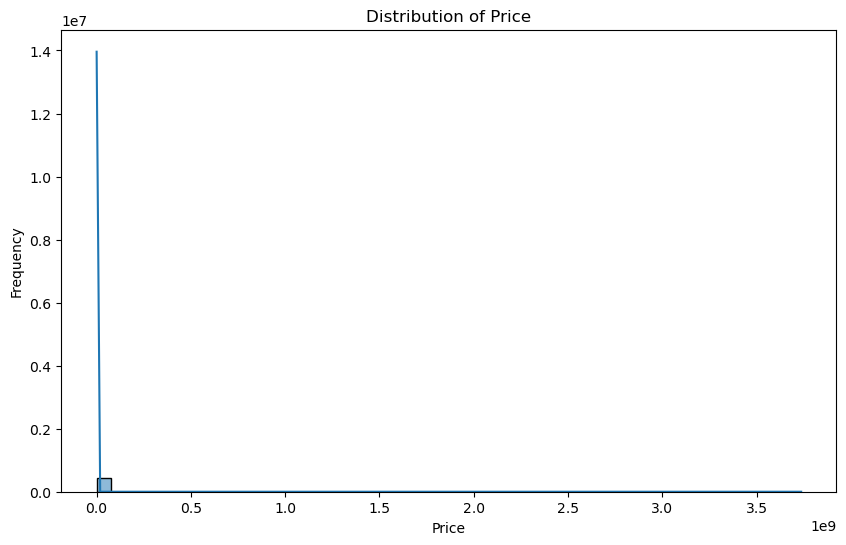

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

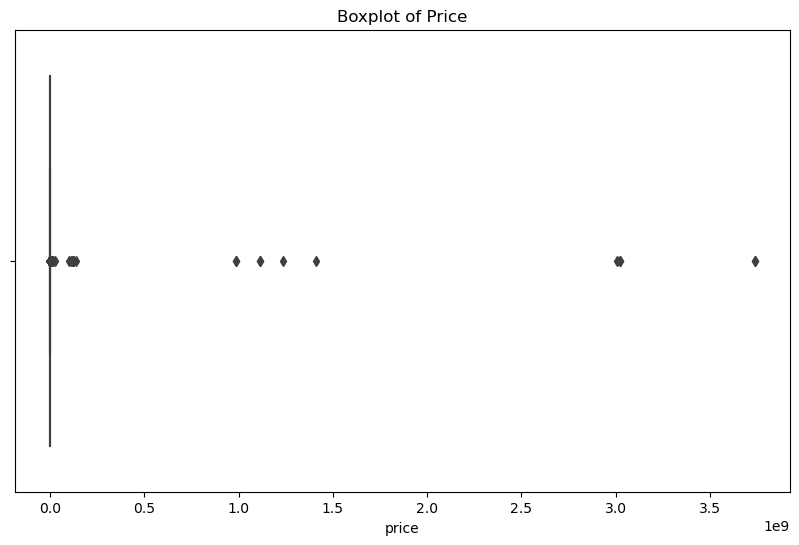

In [6]:
# Check for outliers in 'price' and 'odometer' using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.show()


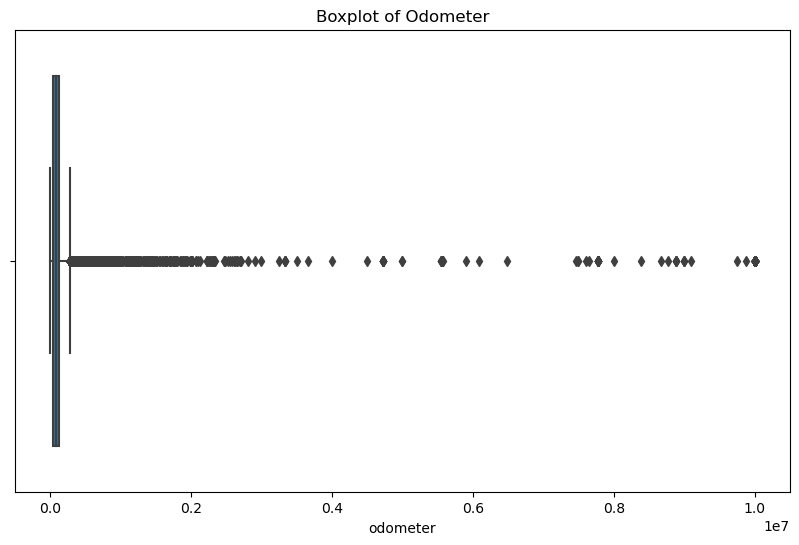

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['odometer'])
plt.title('Boxplot of Odometer')
plt.show()

Price and odometer seem to have outliers.

#### 6. Correlation Analysis
Compute the correlation matrix to identify potential multicollinearity between numerical features and the target variable.

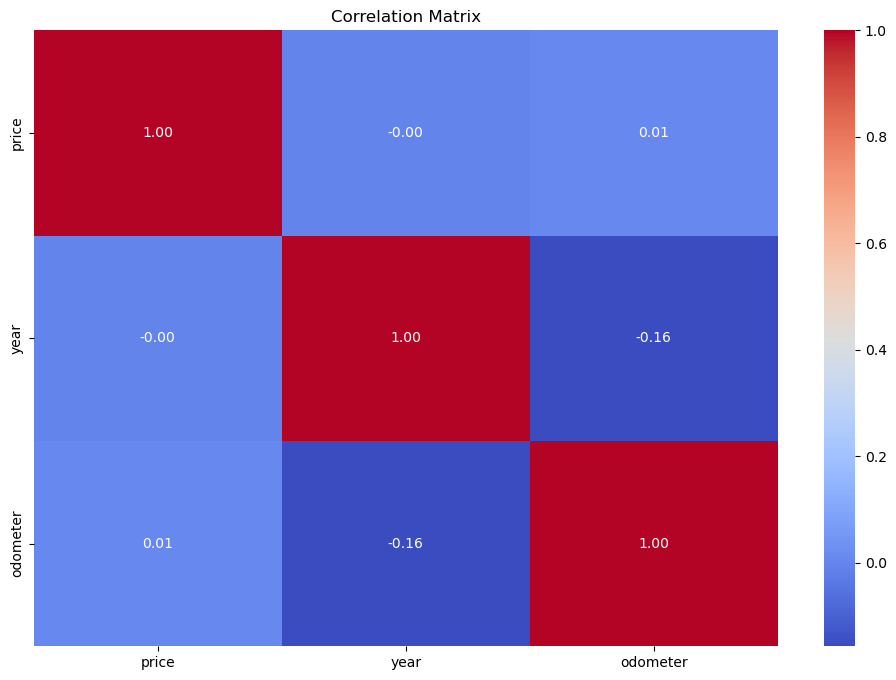

In [8]:
numerical_columns = ['price','year', 'odometer']
df_numerical = df[numerical_columns]

# Compute the correlation matrix
correlation_matrix = df_numerical.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Numerical variables are not highly correlated. 

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Data Cleaning

In [9]:
# Remove unrealistic values in 'price' and 'odometer'
df = df[(df['price'] > 0) & (df['odometer'] > 0)]

In [10]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390581 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            390581 non-null  int64  
 1   region        390581 non-null  object 
 2   price         390581 non-null  int64  
 3   year          389482 non-null  float64
 4   manufacturer  374714 non-null  object 
 5   model         385965 non-null  object 
 6   condition     240504 non-null  object 
 7   cylinders     231815 non-null  object 
 8   fuel          388295 non-null  object 
 9   odometer      390581 non-null  float64
 10  title_status  383368 non-null  object 
 11  transmission  389061 non-null  object 
 12  VIN           239774 non-null  object 
 13  drive         271277 non-null  object 
 14  size          110423 non-null  object 
 15  type          305431 non-null  object 
 16  paint_color   274961 non-null  object 
 17  state         390581 non-null  object 
dtypes: float

In [11]:
# Drop Unnecessary Columns
df = df.drop(['id', 'region', 'state', 'VIN'], axis=1)

# Drop Columns with Not Enough Data
df = df.drop(['size'], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390581 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         390581 non-null  int64  
 1   year          389482 non-null  float64
 2   manufacturer  374714 non-null  object 
 3   model         385965 non-null  object 
 4   condition     240504 non-null  object 
 5   cylinders     231815 non-null  object 
 6   fuel          388295 non-null  object 
 7   odometer      390581 non-null  float64
 8   title_status  383368 non-null  object 
 9   transmission  389061 non-null  object 
 10  drive         271277 non-null  object 
 11  type          305431 non-null  object 
 12  paint_color   274961 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 41.7+ MB


#### Handle Missing Values

In [13]:
# Remove rows where variables are NaN
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111427 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         111427 non-null  int64  
 1   year          111427 non-null  float64
 2   manufacturer  111427 non-null  object 
 3   model         111427 non-null  object 
 4   condition     111427 non-null  object 
 5   cylinders     111427 non-null  object 
 6   fuel          111427 non-null  object 
 7   odometer      111427 non-null  float64
 8   title_status  111427 non-null  object 
 9   transmission  111427 non-null  object 
 10  drive         111427 non-null  object 
 11  type          111427 non-null  object 
 12  paint_color   111427 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 11.9+ MB


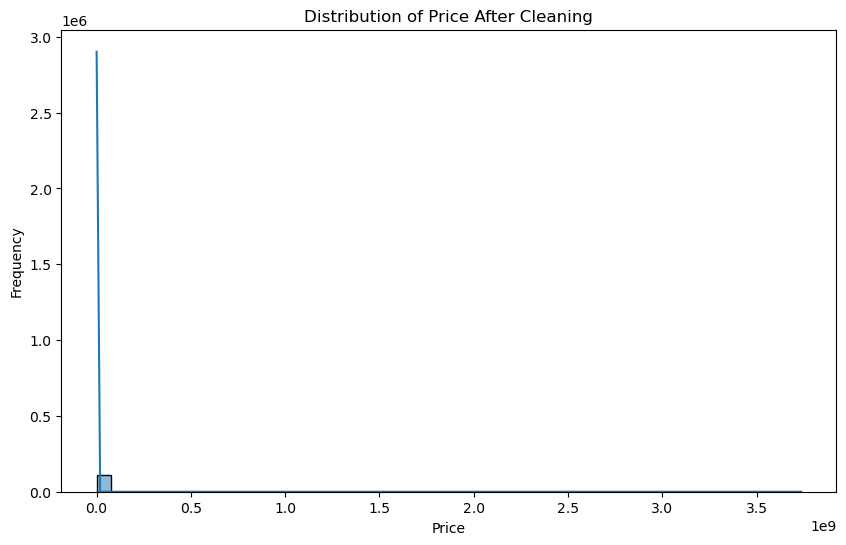

In [15]:
## Visualize the distribution of 'price' after cleaning
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price After Cleaning')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

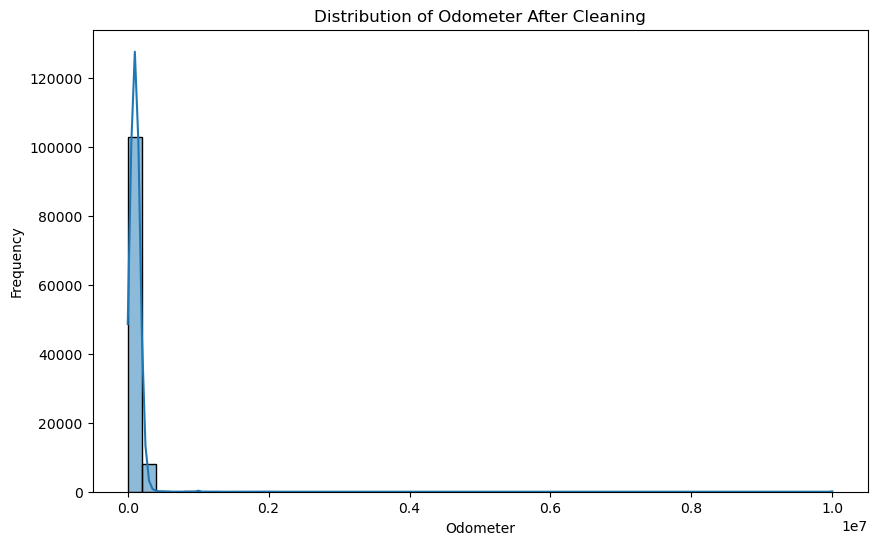

In [16]:
## Visualize the distribution of 'odometer' after cleaning
plt.figure(figsize=(10, 6))
sns.histplot(df['odometer'], bins=50, kde=True)
plt.title('Distribution of Odometer After Cleaning')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

#### Feature Engineering

In [17]:
# Create new feature 'car_age'
df['car_age'] = 2024 - df['year']

#### Data Transformation

In [18]:
# Apply log transformation to 'price' and 'odometer' to normalize their distributions
df['price_log'] = np.log1p(df['price'])
df['odometer_log'] = np.log1p(df['odometer'])

# Updated Descriptive Statistics
df[['price', 'price_log', 'odometer', 'odometer_log', 'car_age']].describe()


,price,price_log,odometer,odometer_log,car_age
count,1.114270e+05,111427.000000,1.114270e+05,111427.000000,111427.000000
mean,6.312663e+04,9.256585,1.113464e+05,11.250920,14.565671
std,1.169797e+07,1.215175,1.860865e+05,1.160534,9.615429
min,1.000000e+00,0.693147,1.000000e+00,0.693147,2.000000
25%,6.000000e+03,8.699681,5.634400e+04,10.939249,9.000000
50%,1.150000e+04,9.350189,1.033960e+05,11.546331,12.000000
75%,2.350000e+04,10.064798,1.485770e+05,11.908865,18.000000
max,3.736929e+09,22.041530,1.000000e+07,16.118096,124.000000


In [22]:
# Drop price and odometer
df = df.drop(['price', 'odometer', 'year'], axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111427 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   manufacturer  111427 non-null  object 
 1   model         111427 non-null  object 
 2   condition     111427 non-null  object 
 3   cylinders     111427 non-null  object 
 4   fuel          111427 non-null  object 
 5   title_status  111427 non-null  object 
 6   transmission  111427 non-null  object 
 7   drive         111427 non-null  object 
 8   type          111427 non-null  object 
 9   paint_color   111427 non-null  object 
 10  car_age       111427 non-null  float64
 11  price_log     111427 non-null  float64
 12  odometer_log  111427 non-null  float64
dtypes: float64(3), object(10)
memory usage: 11.9+ MB


#### Encode Categorical Variables

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['manufacturer'] = label_encoder.fit_transform(df['manufacturer'])
df['model'] = label_encoder.fit_transform(df['model'])
df['condition'] = label_encoder.fit_transform(df['condition'])
df['cylinders'] = label_encoder.fit_transform(df['cylinders'])
df['fuel'] = label_encoder.fit_transform(df['fuel'])
df['title_status'] = label_encoder.fit_transform(df['title_status'])
df['transmission'] = label_encoder.fit_transform(df['transmission'])
df['drive'] = label_encoder.fit_transform(df['drive'])
df['type'] = label_encoder.fit_transform(df['type'])
df['paint_color'] = label_encoder.fit_transform(df['paint_color'])

#### Split Data

In [25]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop('price_log', axis=1)
y = df['price_log']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Ridge Regression Model

In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the range of alpha values to explore
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Ridge Regression model
ridge_reg = Ridge()

# Initialize GridSearchCV
ridge_grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the model
ridge_grid_search.fit(X_train, y_train)

# Best hyperparameter values
print("Best alpha:", ridge_grid_search.best_params_)

# Best RMSE score
print("Best RMSE:", np.sqrt(-ridge_grid_search.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best alpha: {'alpha': 10}
Best RMSE: 1.0705495509044318


In [36]:
# Fit Ridge Regression model with the best alpha value from GridSearchCV
best_alpha = ridge_grid_search.best_params_['alpha']
ridge_reg = Ridge(alpha=best_alpha)
ridge_reg.fit(X_train, y_train)

# Get feature importance
ridge_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge_reg.coef_
})

# Sort features by absolute coefficient values
ridge_feature_importance = ridge_feature_importance.reindex(ridge_feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

# Display the most important features
print("Top 10 Most Important Features from Ridge Regression:")
print(ridge_feature_importance.head(10))

Top 10 Most Important Features from Ridge Regression:
         Feature  Coefficient
3      cylinders     0.244705
11  odometer_log    -0.244100
4           fuel    -0.217075
6   transmission     0.085438
10       car_age    -0.032106
5   title_status    -0.029630
2      condition     0.009618
7          drive    -0.006011
8           type    -0.005691
0   manufacturer     0.002196


#### Lasso Regression Model

In [37]:
from sklearn.linear_model import Lasso

# Define the range of alpha values to explore
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Lasso Regression model
lasso_reg = Lasso()

# Initialize GridSearchCV
lasso_grid_search = GridSearchCV(lasso_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the model
lasso_grid_search.fit(X_train, y_train)

# Best hyperparameter values
print("Best alpha:", lasso_grid_search.best_params_)

# Best RMSE score
print("Best RMSE:", np.sqrt(-lasso_grid_search.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best alpha: {'alpha': 0.001}
Best RMSE: 1.0705543881458524


In [38]:
# Fit Lasso Regression model with the best alpha value from GridSearchCV
best_alpha = lasso_grid_search.best_params_['alpha']
lasso_reg = Lasso(alpha=best_alpha)
lasso_reg.fit(X_train, y_train)

# Get feature importance
lasso_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_reg.coef_
})

# Sort features by absolute coefficient values
lasso_feature_importance = lasso_feature_importance.reindex(lasso_feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

# Display the most important features
print("Top 10 Most Important Features from Lasso Regression:")
print(lasso_feature_importance.head(10))

Top 10 Most Important Features from Lasso Regression:
         Feature  Coefficient
3      cylinders     0.244573
11  odometer_log    -0.243591
4           fuel    -0.213383
6   transmission     0.083230
10       car_age    -0.032140
5   title_status    -0.028473
2      condition     0.009051
8           type    -0.005597
7          drive    -0.004283
0   manufacturer     0.002185


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

After building and evaluating the Ridge and Lasso regression models, it's crucial to reflect on the quality of these models in the context of our business objective. Our primary goal was to understand the drivers of used car prices and provide meaningful insights to stakeholders.

#### Model Performance
- Ridge Regression Model:
Best Alpha: 10
Best RMSE: 1.0705
- Lasso Regression Model:
Best Alpha: 0.001
Best RMSE: 1.0706

Both models achieved relatively similar RMSE scores, with the Lasso regression model having a slightly better RMSE. This suggests that both models can predict the price of used cars with reasonable accuracy.


#### Feature Importance
- Most positively important coefficient in both Ridge and Lasso regression is "cylinders" which means that cars with more cylinders tend to have higher prices.

- Most negatively important coefficient in both Ridge and Lasso regression is "odometer" which means that higher mileage (represented in logarithmic scale) tends to decrease the price of used cars. 

These insights can be valuable for stakeholders to understand the factors affecting the prices of used cars and to make informed decisions related to pricing strategies, marketing, and inventory management.


#### Price Prediction

Utilize the best-performing model (Lasso regression with an alpha of 0.001) to predict the prices of used cars accurately. This model can be deployed in a real-world setting to estimate the prices of used cars based on their features.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

## Deployment: Report on Used Car Pricing Analysis

### Executive Summary
The objective of this analysis was to identify the key factors influencing the prices of used cars. We employed two regression models, Ridge and Lasso, to predict the prices of used cars based on various features. The primary aim is to provide actionable insights to used car dealers to fine-tune their inventory and pricing strategies.

### Key Findings
#### Most Important Features
Both Ridge and Lasso regression models identified the following features as the most influential factors affecting the prices of used cars:

1. Cylinders: Cars with more cylinders tend to have higher prices.
2. Odometer (Logarithmic Scale): Higher mileage decreases the price of used cars.
3. Fuel Type: Certain fuel types may be associated with lower prices.
4. Transmission Type: Certain types of transmissions might be associated with higher prices.
5. Car Age: Older cars generally have lower prices.
6. Title Status: Certain title statuses may be associated with lower prices.
7. Condition: Better condition of the car can lead to higher prices.
8. Type: Certain car types may be associated with lower prices.
9. Drive Type: Certain drive types might be associated with lower prices.
10. Manufacturer: Certain manufacturers may have higher-priced vehicles.

### Recommendations for Used Car Dealers
#### Inventory Management

- Stock vehicles with higher cylinder counts to target customers looking for premium or performance cars.
- Prioritize vehicles with lower mileage and better condition to command higher prices.
- Consider the age, title status, and type of vehicles to determine the optimal inventory mix.

#### Pricing Strategy

- Adjust pricing based on the identified influential factors. For example, newer cars with lower mileage and more cylinders can be priced higher.
- Implement dynamic pricing strategies to reflect the condition, type, and other factors influencing the price of the vehicle.

#### Marketing and Sales

- Highlight the features and conditions that increase the value of the vehicle in advertisements and sales pitches.
- Offer promotions or discounts on vehicles with less desirable features to attract a broader customer base.


#### Conclusion
Understanding the key factors influencing the prices of used cars is crucial for used car dealers to make informed decisions related to inventory management, pricing strategies, and marketing. By focusing on the most influential features identified in this analysis, used car dealers can fine-tune their inventory and pricing strategies to maximize profitability and meet the needs of their target customers effectively.

By implementing these recommendations and insights derived from the Ridge and Lasso regression models, used car dealers can gain a competitive edge in the market and enhance their overall business performance.